# Concrete Compressive Strength

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
import scipy
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, plot_confusion_matrix,ConfusionMatrixDisplay, classification_report,accuracy_score,f1_score


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

## Loading Data

In [4]:
dataset = pd.read_excel('Regression_Datasets\Concrete_Data\Concrete_Data.xls')

In [5]:
dataset.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

## Data Analysis

In [10]:
print(dataset.shape)

(1030, 9)


In [11]:
print(np.count_nonzero(dataset=="?"))
print(np.count_nonzero(dataset==np.nan))

0
0


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [31]:
dataset.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [72]:
dataset.describe()

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

<AxesSubplot:>

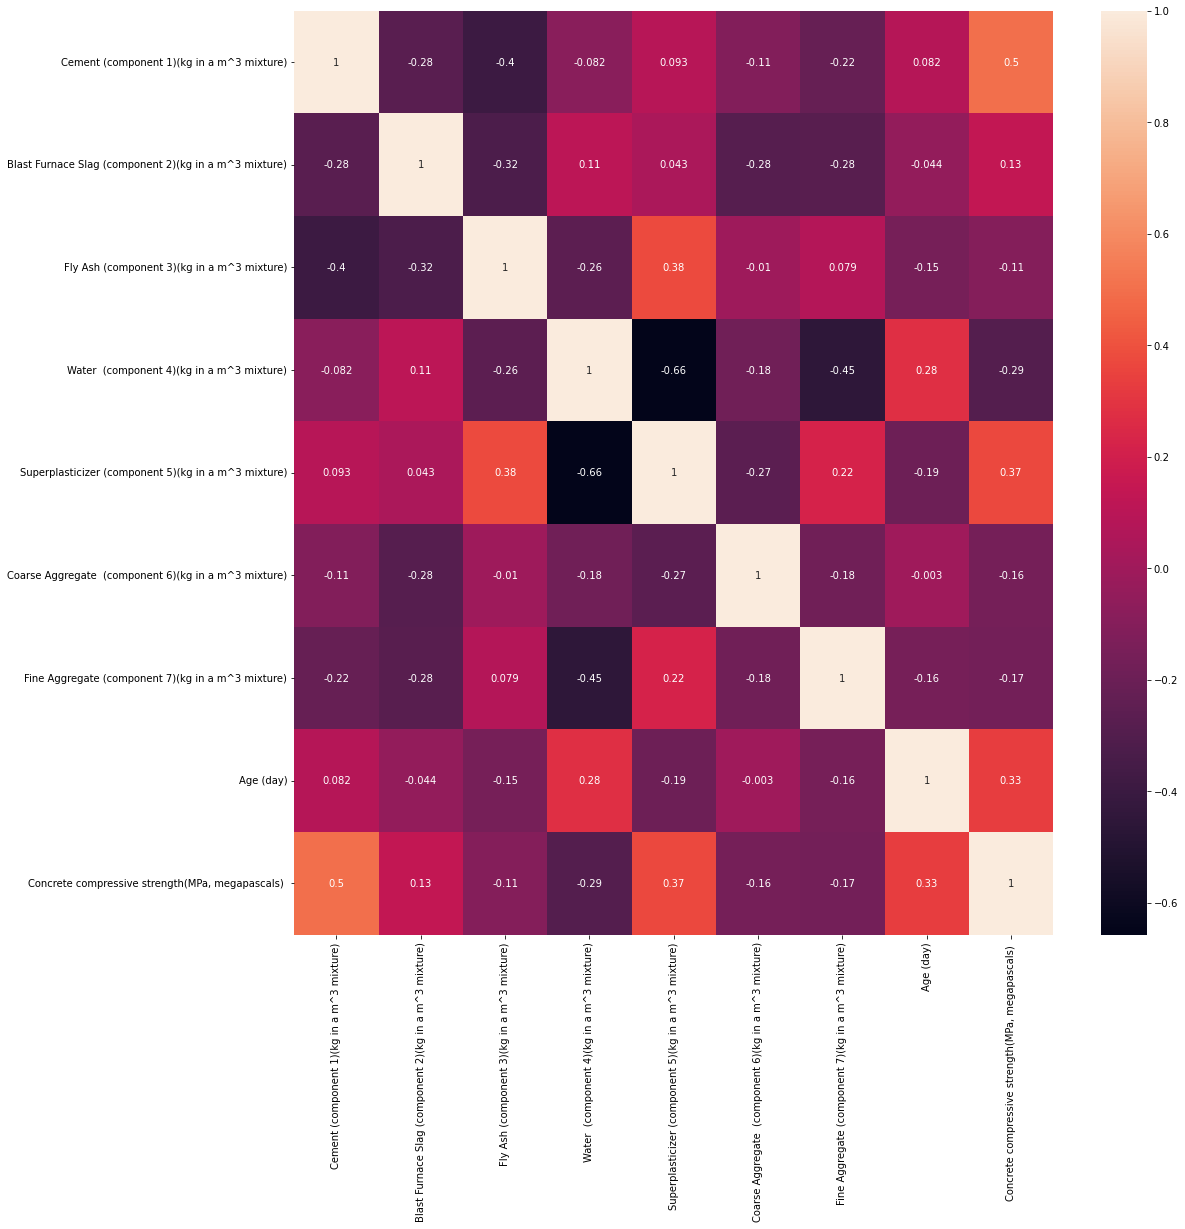

In [33]:
plt.figure(figsize=(17,17))
sns.heatmap(dataset.corr(), annot =True)

<AxesSubplot:>

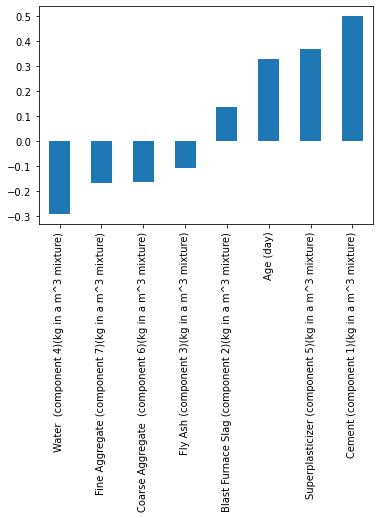

In [177]:
cor = dataset.corr()['Concrete compressive strength(MPa, megapascals) '][:-1].sort_values()
cor.plot(kind="bar")

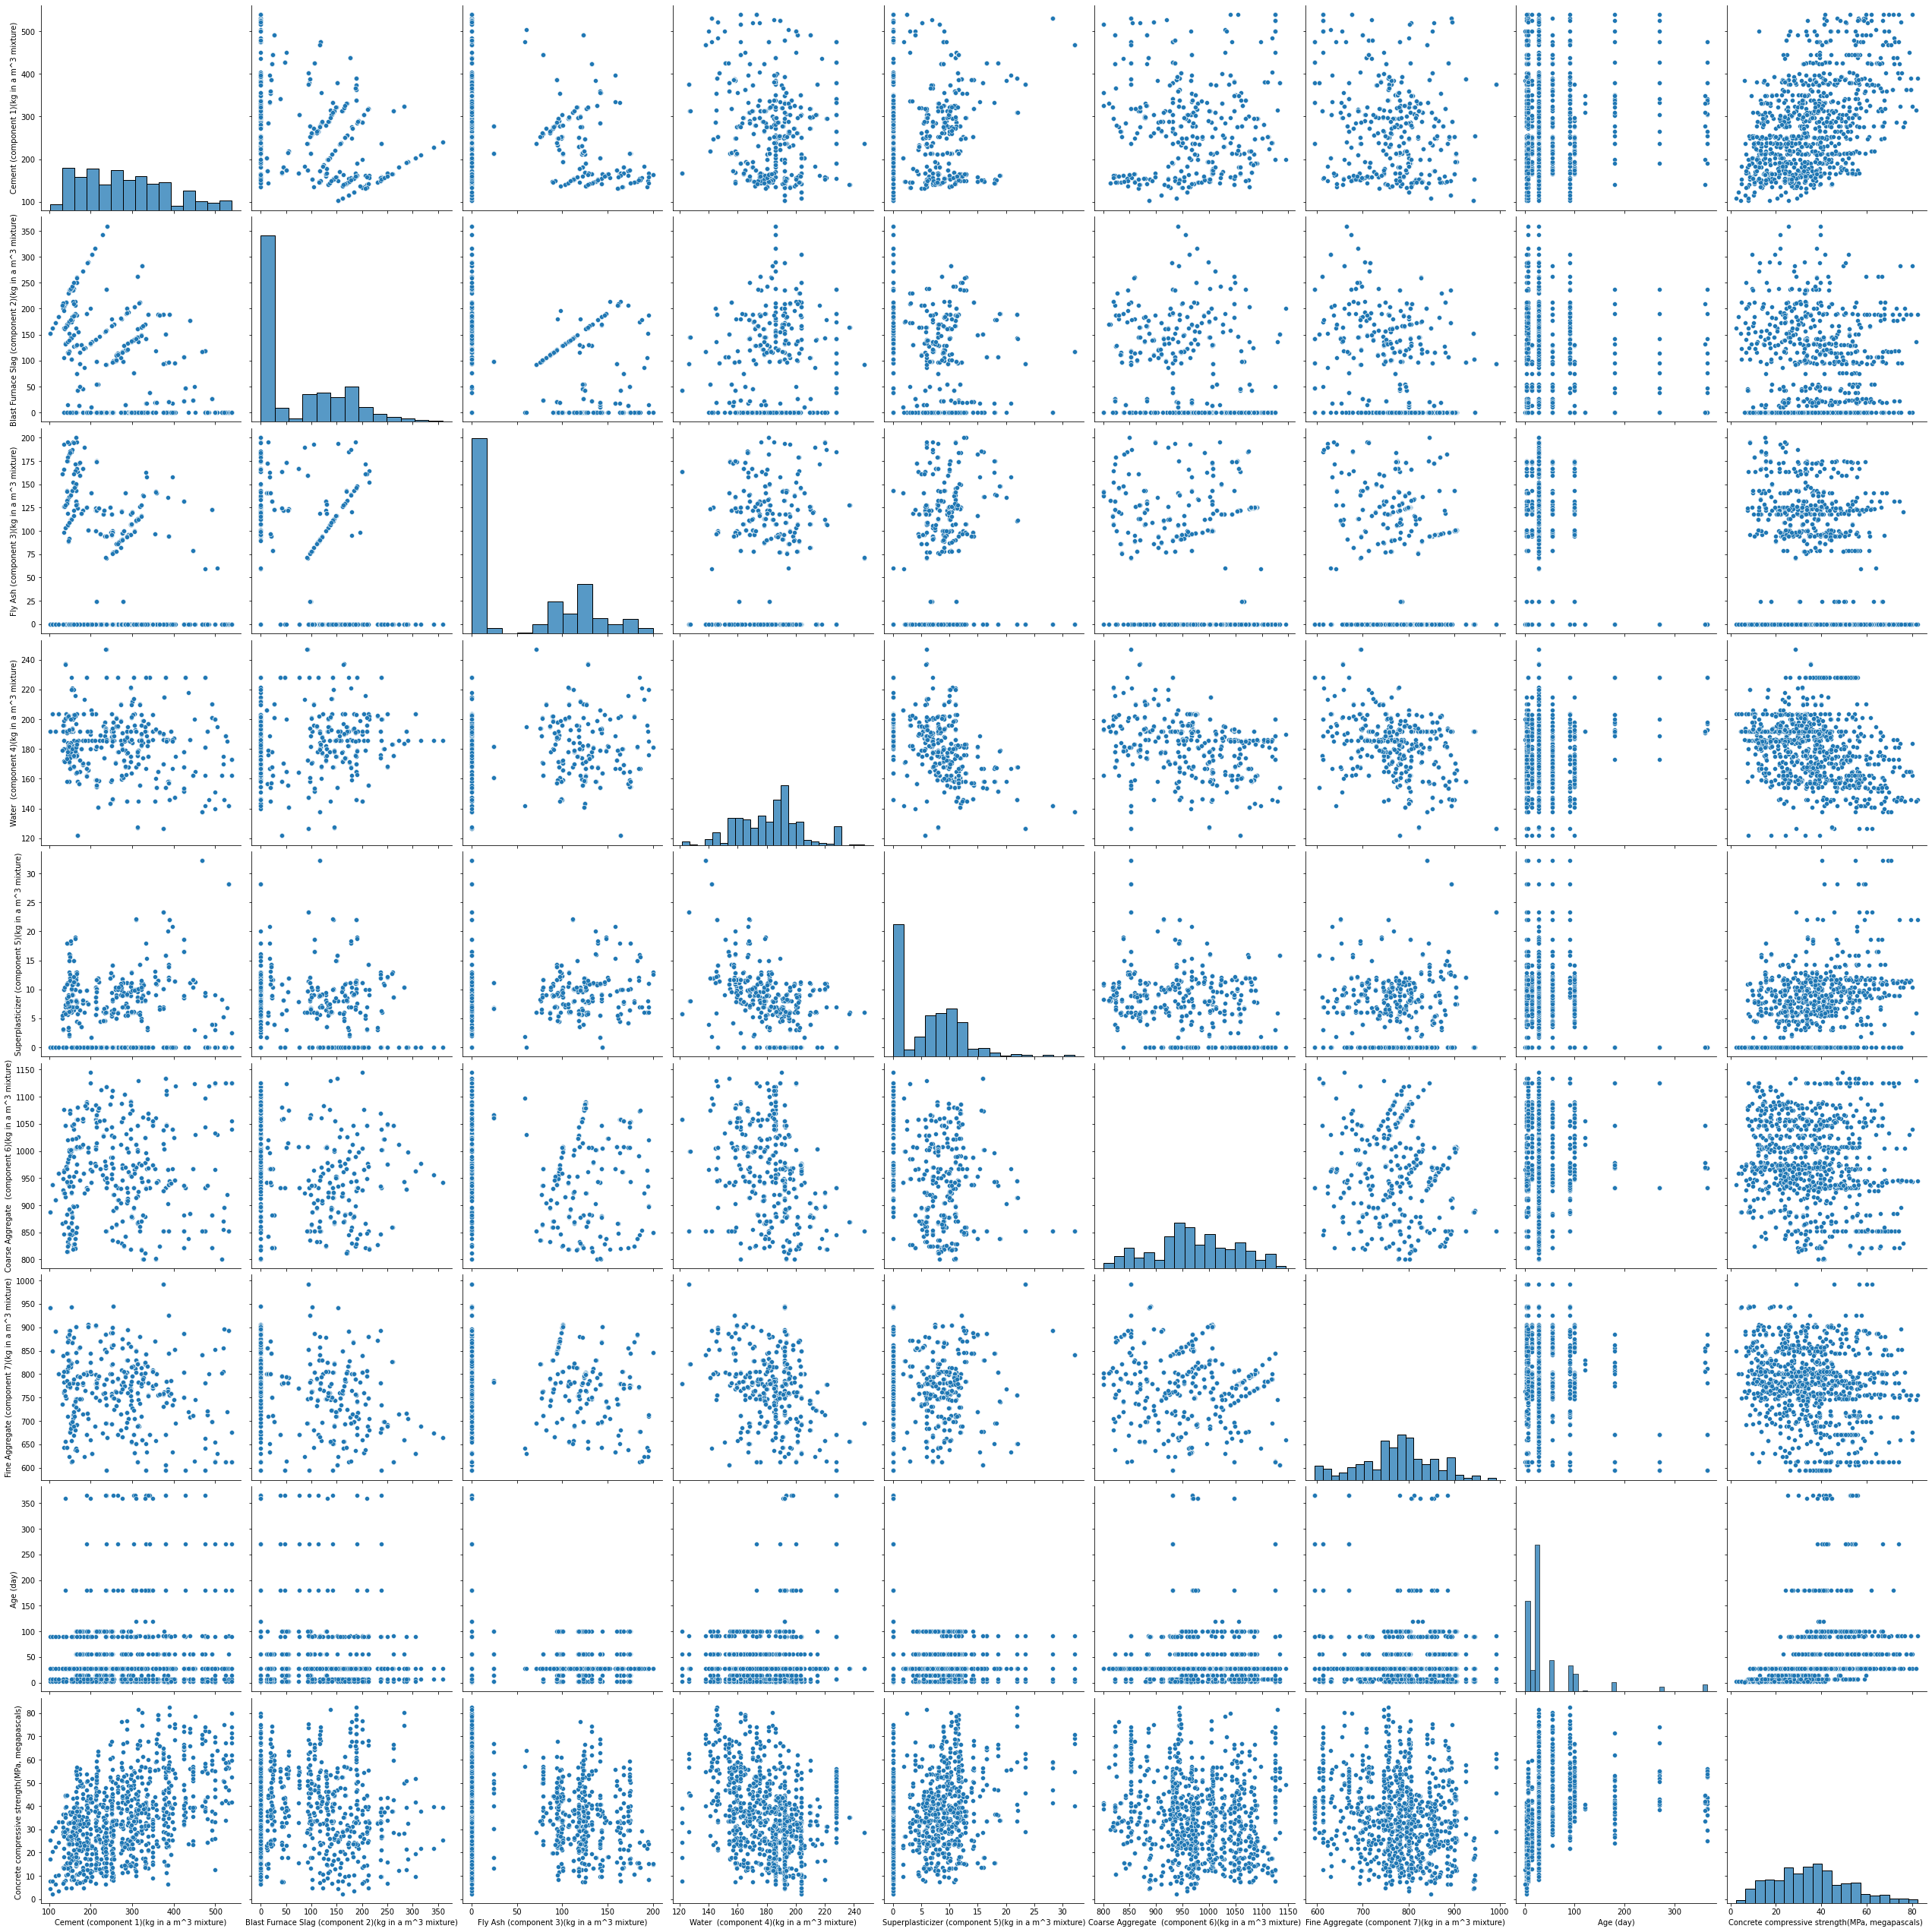

In [40]:

sns.pairplot(dataset, height=4)

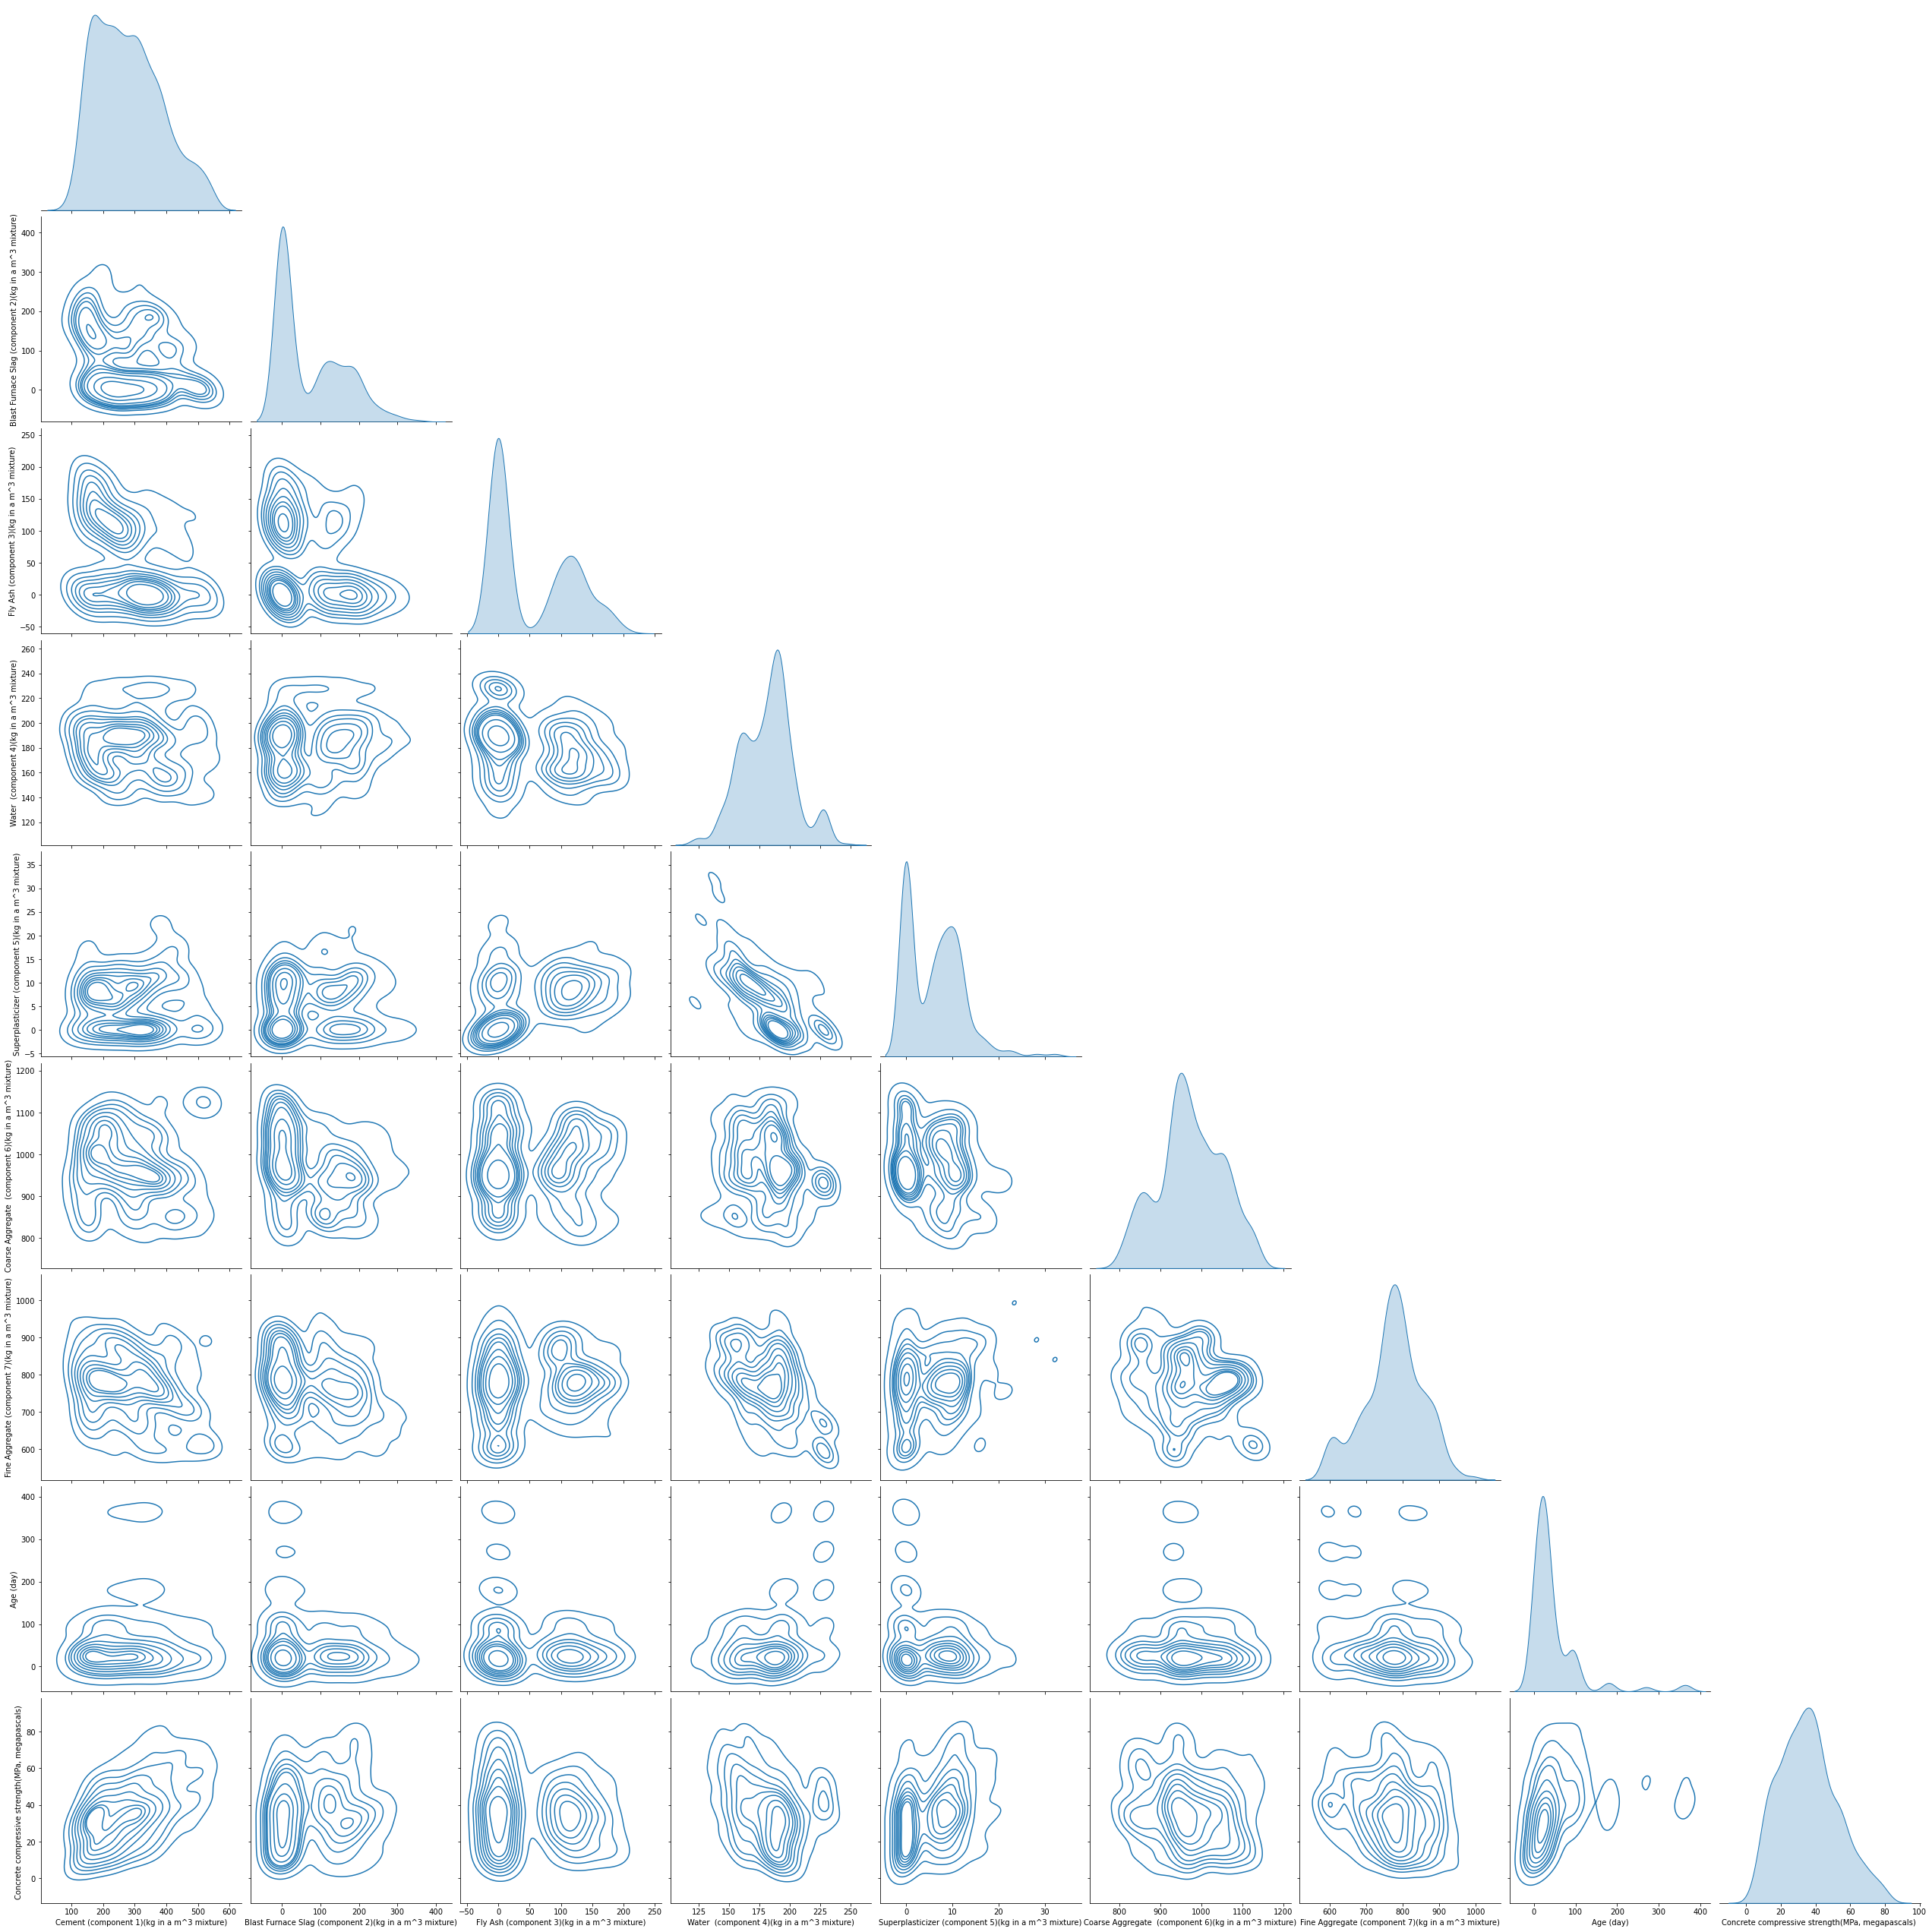

In [66]:
sns.pairplot(dataset, corner=True, height=4, kind="kde")

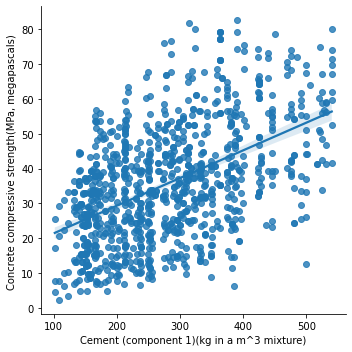

In [67]:
sns.lmplot(x="Cement (component 1)(kg in a m^3 mixture)", y="Concrete compressive strength(MPa, megapascals) ",  data=dataset )

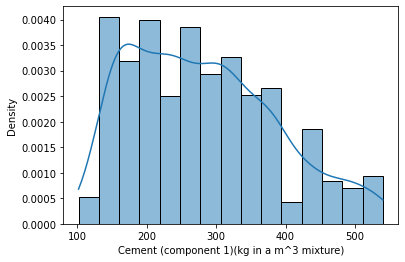

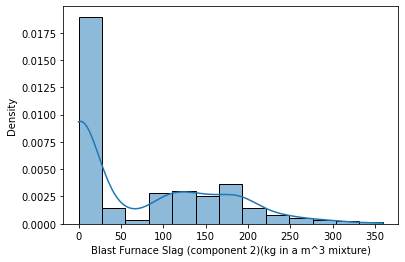

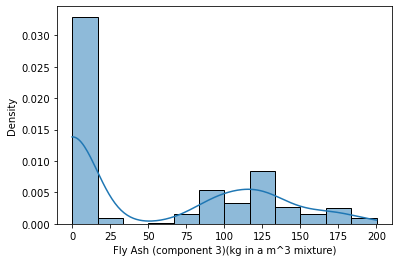

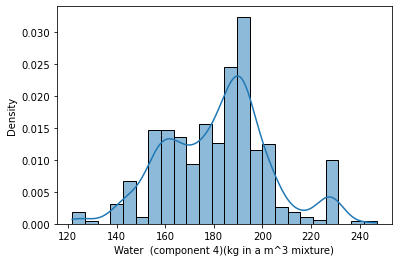

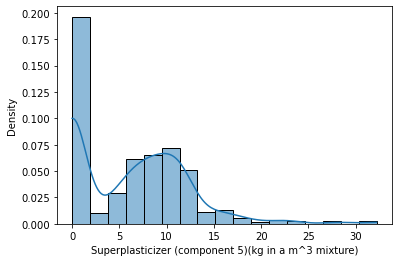

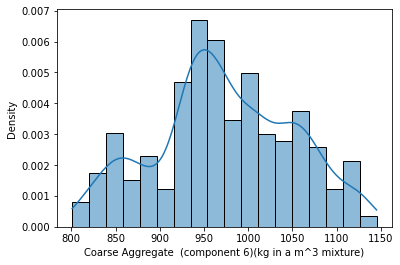

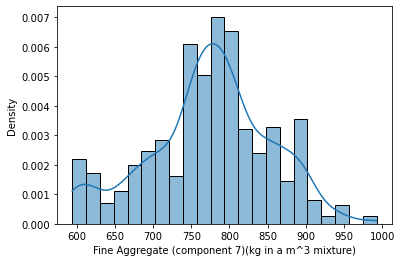

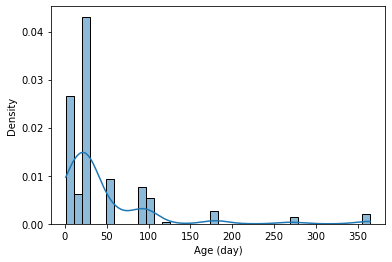

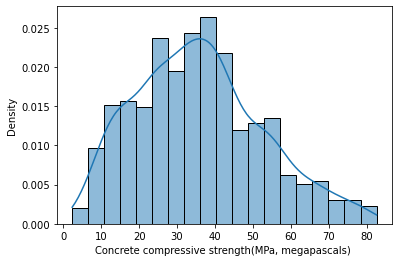

In [73]:

for i in dataset.columns:
    sns.histplot(dataset[i],kde=True, stat="density", linewidth=1)
    plt.show()



In [90]:
dataset["Concrete compressive strength(MPa, megapascals) "].mean()

35.81783582611362

## Create train and test set

In [126]:
X = dataset.iloc[:,:-1]
y = dataset["Concrete compressive strength(MPa, megapascals) "]

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X.astype(int), y.astype(int), test_size=0.2, random_state=0)


In [128]:
StScale = StandardScaler()
X_test = StScale.fit_transform(X_test)
X_train = StScale.fit_transform(X_train)

## Linear regression

In [129]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

### Linear regression Analysis

In [130]:
lin_reg_predict = lin_reg.predict(X_test)

In [131]:
print("mean absolute error: ", mean_absolute_error(y_test, lin_reg_predict))
print("mean squared error: ", mean_squared_error(y_test, lin_reg_predict))
print("root mean squared error: ",np.sqrt( mean_squared_error(y_test, lin_reg_predict)))

mean absolute error:  8.208524453179605
mean squared error:  104.16869138610537
root mean squared error:  10.206306451704522


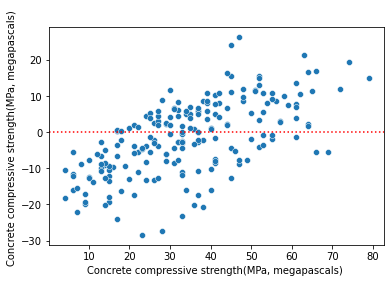

In [132]:
lin_reg_res = y_test - lin_reg_predict
sns.scatterplot(x=y_test, y =lin_reg_res)
plt.axhline(y=0, color='r', linestyle='dotted')

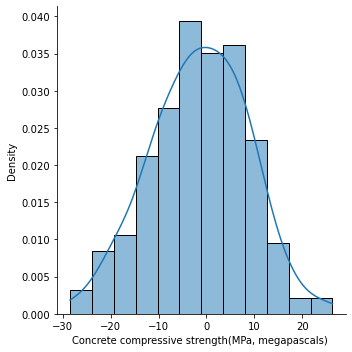

In [133]:
sns.displot(lin_reg_res,kde=True, stat="density")

In [134]:
lin_reg_res.mean()

-1.4514563106796083

In [135]:
lin_reg.coef_

array([12.45035483,  9.53385969,  5.89284828, -3.35276827,  1.65845725,
        1.60907757,  1.72697036,  7.1322926 ])

In [162]:
X_test.shape


(206, 8)

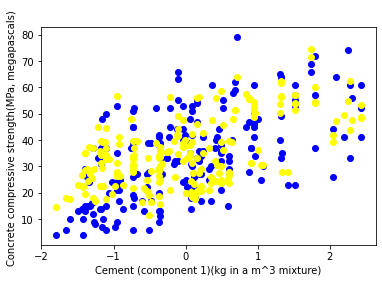

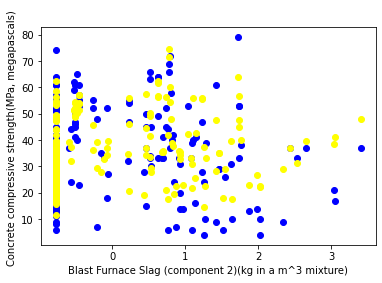

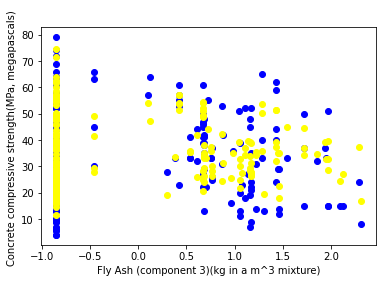

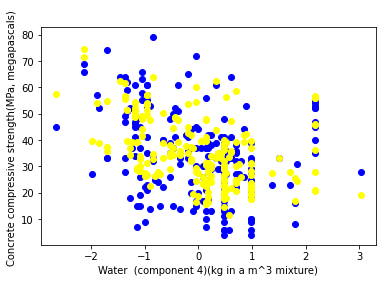

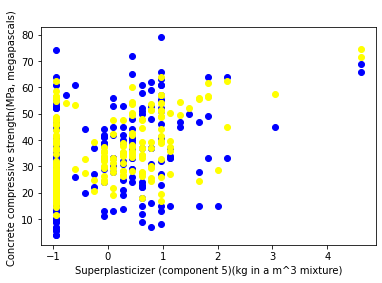

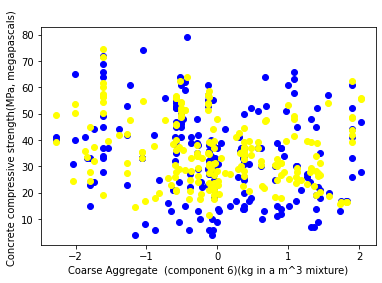

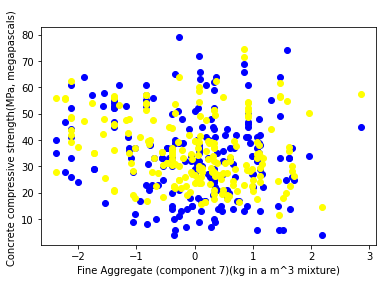

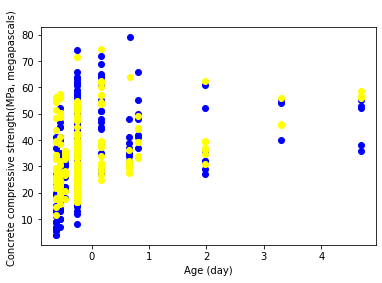

In [171]:
for i in range (8):
    plt.scatter(X_test[:, i], y_test, color = 'blue')
    plt.scatter(X_test[:, i], lin_reg_predict, color = 'yellow')
    plt.ylabel("Concrete compressive strength(MPa, megapascals) ")
    plt.xlabel(dataset.columns[i])
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

## Support vector regression

## Decision tree regression

## Random forest regression